In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Churn Data
Imaginary data from a ride-sharing app usage in a set of imaginary cities.

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
ride = pd.read_csv('./churn_data.csv')
ride.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_inc_price,inc_pct,weekday_pct,fancy_car_user,city_Carthag,city_Harko,phone_iPhone,first_month_cat_more_1_trip,first_month_cat_no_trips,month_5_still_here
0,3.67,5.0,4.7,1.10,15.4,46.2,True,0,1,1,1,0,1
1,8.26,5.0,5.0,1.00,0.0,50.0,False,1,0,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,100.0,False,1,0,1,1,0,0
3,2.36,4.9,4.6,1.14,20.0,80.0,True,0,1,1,1,0,1
4,3.13,4.9,4.4,1.19,11.8,82.4,False,0,0,0,1,0,0


In [4]:
ride.shape

(50000, 13)

Use first month's worth of data to predict whether the app's users will remain users of the service at the 5 month mark

In [5]:
X = ride.drop('month_5_still_here', axis=1)
y = ride['month_5_still_here']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)

## XGBoost Classifier (Logistic)

In [7]:
# initiate xgbclassifier
xg_cl = xgb.XGBClassifier(objective='binary:logistic',
                          n_estimators=10,
                          seed=123)

In [8]:
# fit and predict
xg_cl.fit(X_train, y_train)

preds = xg_cl.predict(X_test)

acc = accuracy_score(y_test, preds)
print(f'test acc: {acc: .3f}')

test acc:  0.743


## Cross-validation using the XGBoost API

In [9]:
# first, create a DMatrix from X and y
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# craete parameter dictionary
params = {'objective': 'reg:logistic',
          'max_depth': 3}

In [10]:
# perform cv
cv_results = xgb.cv(dtrain=churn_dmatrix,
                    params=params,
                    nfold=3,
                    num_boost_round=5, # no of trees
                    metrics='error',
                    as_pandas=True,
                    seed=123)
cv_results

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.28232,0.002366,0.28378,0.001932
1,0.26951,0.001855,0.27190,0.001932
2,0.25605,0.003213,0.25798,0.003963
3,0.25090,0.001845,0.25434,0.003827
4,0.24654,0.001981,0.24852,0.000934


In [11]:
print(f'test acc: {1-cv_results.iloc[-1, 2]}')

test acc: 0.75148


In [12]:
# using auc metric
# perform cv
cv_results = xgb.cv(dtrain=churn_dmatrix,
                    params=params,
                    nfold=3,
                    num_boost_round=5, # no of trees
                    metrics='auc',
                    as_pandas=True,
                    seed=123)
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.768893,0.001544,0.767863,0.002820
1,0.790864,0.006758,0.789157,0.006846
2,0.815872,0.003900,0.814476,0.005997
3,0.822959,0.002018,0.821682,0.003912
4,0.827528,0.000769,0.826191,0.001937


# `sklearn` Breast Cancer Dataset

In [13]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [14]:
breast = datasets.load_breast_cancer()
breast.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
X = breast['data']
y = breast['target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)

## Decision Tree Classifier

In [17]:
# initiate tree classifier, fit, and eval
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

dt_clf_4.fit(X_train, y_train)

y_pred = dt_clf_4.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'test acc: {acc: .3f}')

test acc:  0.974


# Ames, Iowa Housing Prices Dataset

In [18]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [19]:
ames = pd.read_csv('./ames.csv')
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,0,1710,1,0,2,1,3,0,548,Y,208500
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,1976,0,1262,0,1,2,0,3,1,460,Y,181500
2,60,RL,68.0,11250,CollgCr,1Fam,2Story,7,5,2001,1,1786,1,0,2,1,3,1,608,Y,223500
3,70,RL,60.0,9550,Crawfor,1Fam,2Story,7,5,1915,1,1717,1,0,1,0,3,1,642,Y,140000
4,60,RL,84.0,14260,NoRidge,1Fam,2Story,8,5,2000,0,2198,1,0,2,1,4,1,836,Y,250000


In [20]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Neighborhood  1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   HouseStyle    1460 non-null   object 
 7   OverallQual   1460 non-null   int64  
 8   OverallCond   1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  Remodeled     1460 non-null   int64  
 11  GrLivArea     1460 non-null   int64  
 12  BsmtFullBath  1460 non-null   int64  
 13  BsmtHalfBath  1460 non-null   int64  
 14  FullBath      1460 non-null   int64  
 15  HalfBath      1460 non-null   int64  
 16  BedroomAbvGr  1460 non-null   int64  
 17  Fireplaces    1460 non-null   int64  
 18  GarageArea    1460 non-null 

In [21]:
ames_ = ames.copy()
ames_.fillna(0, inplace=True) #as they did
ames_ = pd.get_dummies(ames_, drop_first=True)
ames_.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y
0,60,65.0,8450,7,5,2003,0,1710,1,0,2,1,3,0,548,208500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20,80.0,9600,6,8,1976,0,1262,0,1,2,0,3,1,460,181500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,2001,1,1786,1,0,2,1,3,1,608,223500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,70,60.0,9550,7,5,1915,1,1717,1,0,1,0,3,1,642,140000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,60,84.0,14260,8,5,2000,0,2198,1,0,2,1,4,1,836,250000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [22]:
X = ames_.drop('SalePrice', axis=1)
y = ames_['SalePrice']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)

## XGBRegressor
with `tree` as base learners and using the `sklearn`'s API

In [24]:
from sklearn.metrics import mean_squared_error as MSE

In [25]:
# initiate regressor, fit, and predict
xg_reg = xgb.XGBRegressor(objective='reg:linear',
                          n_estimators=10,
                          booster='gbtree',
                          seed=123)

xg_reg.fit(X_train, y_train)

y_pred = xg_reg.predict(X_test)

# compute rmse
rmse = np.sqrt(MSE(y_test, y_pred))
print(f'RMSE: {rmse}')

[20:17:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 78847.40175843415


## XGBRegressor
with `linear` as base learner and using `XGBoost`'s own learning API

In [26]:
# first, convert training and test sets into DMatrices
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

# create parameter dict
params = {'booster': 'gblinear',
          'objective': 'reg:linear'}

In [27]:
# train, predict, eval
xg_reg = xgb.train(dtrain=DM_train,
                   params=params,
                   num_boost_round=5)

y_pred = xg_reg.predict(DM_test)

rmse = np.sqrt(MSE(y_test, y_pred))
print(f'RMSE: {rmse}')

[20:17:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 44331.64506083733


## Cross-validation

In [28]:
# create DMatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# create params
params = {'objective': 'reg:linear',
          'max_depth': 4}

In [29]:
# perform cv
cv_results = xgb.cv(dtrain=housing_dmatrix,
                    params=params,
                    nfold=4,
                    num_boost_round=5,
                    metrics='rmse',
                    as_pandas=True,
                    seed=123)
cv_results

[20:17:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,141767.488281,429.449371,142980.464844,1193.806011
1,102832.562500,322.503447,104891.398438,1223.161012
2,75872.621094,266.493573,79478.947265,1601.341377
3,57245.657226,273.633063,62411.919922,2220.151162
4,44401.291992,316.426590,51348.276367,2963.378029


In [30]:
# perform cv with mae as metric
cv_results = xgb.cv(dtrain=housing_dmatrix,
                    params=params,
                    nfold=4,
                    num_boost_round=5,
                    metrics='mae',
                    as_pandas=True,
                    seed=123)
cv_results

[20:17:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,127343.595703,668.167771,127634.185547,2404.009753
1,89770.031250,456.980559,90122.505860,2107.916842
2,63580.782226,263.442189,64278.558594,1887.552548
3,45633.181640,151.849960,46819.175781,1459.821980
4,33587.097656,87.003217,35670.655274,1140.613227


## Using regularization in `XGBoost` (L2)

In [31]:
# lambda (for L2 reg) values
reg_params = [1, 10, 100]

# create initial param dict
params = {'objective': 'reg:linear',
          'max_depth': 3}

In [32]:
# create empty list for storing rmse as a fxn of l2 complexity
rmses_l2 = []

# iterate over reg_params:
for reg in reg_params:
    # update l2 strength
    params['lambda'] = reg
    
    # pass updated dict into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix,
                             params=params,
                             nfold=2,
                             num_boost_round=5,
                             metrics='rmse',
                             as_pandas=True,
                             seed=123)
    
    # append best rmse (final) to list
    rmses_l2.append(cv_results_rmse['test-rmse-mean'].tail(1).values[0])

# look at best rmse per l2 param
print('Best rmse as a fxn of l2:')
pd.DataFrame(list(zip(reg_params, rmses_l2)),
             columns=['l2', 'rmse'])

[20:17:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best rmse as a fxn of l2:


,l2,rmse
0,1,52275.355469
1,10,57746.060547
2,100,76624.617188


## Visualizing individual `XGBoost` trees

In [33]:
# create param dict
params = {'objective': 'reg:linear',
          'max_depth': 2}

In [34]:
# train model
xg_reg = xgb.train(params=params,
                   dtrain=housing_dmatrix,
                   num_boost_round=10)

[20:17:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


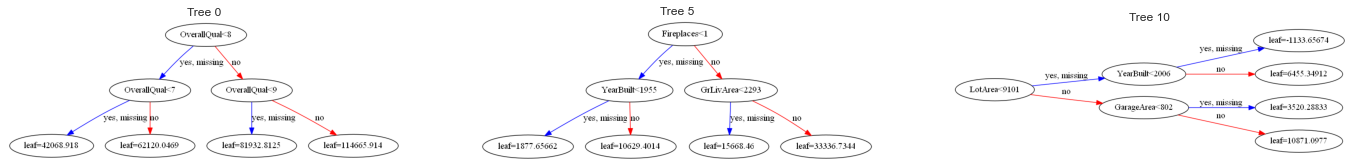

In [35]:
# plot trees
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(24, 8))

xgb.plot_tree(xg_reg, num_trees=0, ax=ax1)
xgb.plot_tree(xg_reg, num_trees=4, ax=ax2)
xgb.plot_tree(xg_reg, num_trees=9, rankdir='LR', ax=ax3)

ax1.set_title('Tree 0')
ax2.set_title('Tree 5')
ax3.set_title('Tree 10')

plt.show()

If you encounter an error with graphviz, do:
```
conda install graphviz
conda install python-graphviz
conda install pydot
```

## Visualizing feature importances

In [36]:
# create param dict
params = {'objective': 'reg:linear',
          'max_depth': 4}

In [37]:
# train model
xg_reg = xgb.train(params=params,
                   dtrain=housing_dmatrix,
                   num_boost_round=10)

[20:17:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


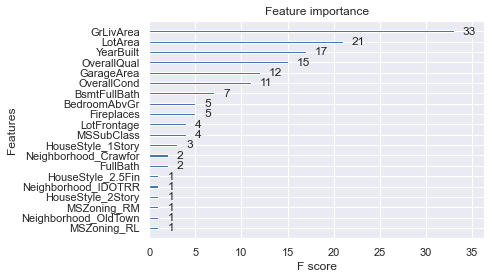

In [38]:
xgb.plot_importance(xg_reg)
plt.show()

## Tuning number of boosting rounds

In [39]:
# create param dict for each tree
params = {'objective': 'reg:linear',
          'max_depth': 3}

# list of number of boosting rounds
num_rounds = [5, 10, 15]

# empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

In [40]:
# iterate over num_rounds
for current in num_rounds:
    #perform cv
    cv_results = xgb.cv(dtrain=housing_dmatrix,
                        params=params,
                        nfold=3,
                        num_boost_round=current,
                        metrics='rmse',
                        as_pandas=True,
                        seed=123)
    #append final round RMSE
    final_rmse_per_round.append(cv_results['test-rmse-mean'].tail().values[-1])

[20:17:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [41]:
# show results
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
pd.DataFrame(num_rounds_rmses, columns=['num_boosting_rounds', 'rmse'])

,num_boosting_rounds,rmse
0,5,50903.299479
1,10,34774.191406
2,15,32895.098307


## Automated boosting round selection using `early_stopping_rounds`

In [42]:
# create param dict for each tree
params = {'objective': 'reg:linear',
          'max_depth': 4}

In [43]:
# perform cv with early stopping
cv_results = xgb.cv(params=params,
                    dtrain=housing_dmatrix,
                    nfold=3,
                    num_boost_round=50,
                    early_stopping_rounds=10,
                    metrics='rmse',
                    as_pandas=True,
                    seed=123)
cv_results

[20:17:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,141871.630208,403.632409,142640.630208,705.552907
1,103057.033854,73.787612,104907.677083,111.124997
2,75975.958333,253.705643,79262.057292,563.761707
3,57420.515625,521.666323,61620.138021,1087.681933
4,44552.960938,544.168971,50437.558594,1846.450522
5,35763.942708,681.796885,43035.660156,2034.476339
6,29861.469401,769.567549,38600.881511,2169.803563
7,25994.679036,756.524834,36071.816407,2109.801581
8,23306.832031,759.237670,34383.183594,1934.542189
9,21459.772786,745.623841,33509.141927,1887.374589


## Tuning `eta`, the learning rate

In [44]:
# create param dict for each tree
params = {'objective': 'reg:linear',
          'max_depth': 3}

# list of eta values and empty list for storing final round rmse
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

In [45]:
# iterate over etas
for curr in eta_vals:
    params['eta'] = curr
    
    #perform cv
    cv_results = xgb.cv(params=params,
                        dtrain=housing_dmatrix,
                        nfold=3,
                        num_boost_round=10,
                        early_stopping_rounds=5,
                        metrics='rmse',
                        as_pandas=True,
                        seed=123)
    
    #append final round rmse
    best_rmse.append(cv_results['test-rmse-mean'].tail().values[-1])

[20:45:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [46]:
# print results
pd.DataFrame(list(zip(eta_vals, best_rmse)),
             columns=['eta', 'best_rmse'])

,eta,best_rmse
0,0.001,195736.406250
1,0.010,179932.161458
2,0.100,79759.401041


## Tuning `max_depth`

In [47]:
params = {'objective': 'reg:linear'}

max_depths = [2, 5, 10, 20]
best_rmse = []

In [48]:
for curr in max_depths:
    params['max_depth'] = curr
    
    cv_results = xgb.cv(params=params,
                        dtrain=housing_dmatrix,
                        nfold=2,
                        num_boost_round=10,
                        early_stopping_rounds=5,
                        metrics='rmse',
                        as_pandas=True,
                        seed=123)
    
    best_rmse.append(cv_results['test-rmse-mean'].tail().values[-1])

[20:57:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:57:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:57:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:57:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:57:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:57:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:57:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:57:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [50]:
pd.DataFrame(list(zip(max_depths, best_rmse)),
            columns=['max_depth', 'best_rmse'])

,max_depth,best_rmse
0,2,37957.476562
1,5,35596.599610
2,10,36065.537110
3,20,36739.574219


## Tuning `colsample_bytree`

In [51]:
params={"objective":"reg:linear",
        "max_depth":3}

colsample_bytree_vals = [0.1, 0.5, 0.8, 1]
best_rmse = []

In [52]:
for curr in colsample_bytree_vals:
    params['colsample_bytree'] = curr
    
    cv_results = xgb.cv(params=params,
                        dtrain=housing_dmatrix,
                        nfold=2,
                        num_boost_round=10,
                        early_stopping_rounds=5,
                        metrics='rmse',
                        as_pandas=True,
                        seed=123)
    
    best_rmse.append(cv_results['test-rmse-mean'].tail().values[-1])

[21:03:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [53]:
pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)),
            columns=['colsample_bytree', 'best_rmse'])

,colsample_bytree,best_rmse
0,0.1,48193.451172
1,0.5,36013.537110
2,0.8,35932.960938
3,1.0,35836.042968


## Grid Search with `XGBoost`

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
# create parameter grid
gbm_param_grid = {'colsample_bytree': [0.3, 0.7],
                  'n_estimators': [50],
                  'max_depth': [2, 5]}

In [57]:
# initiate regressor
gbm = xgb.XGBRegressor()

In [58]:
# initiate grid search object
grid_mse = GridSearchCV(estimator=gbm,
                        param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error',
                        cv=4,
                        verbose=1)

In [59]:
grid_mse.fit(X, y)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[21:18:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[21:18:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:18:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is 

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.6s finished


[21:18:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=4, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.3, 0.7], 'max_depth': [2, 5],
                         'n_estimators': [50]},
             scoring='neg_mean_squared_error', verbose=1)

In [60]:
print(f'Best params: {grid_mse.best_params_}')
print(f'Lowest RMSE: {np.sqrt(np.abs(grid_mse.best_score_))}')

Best params: {'colsample_bytree': 0.7, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE: 29916.562522854438


## Random Search with `XGBoost`

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
gbm_param_grid = {'n_estimators': [25],
                  'max_depth': range(2, 12)}

In [67]:
gbm = xgb.XGBRegressor(n_estimators=10)

In [68]:
random_mse = RandomizedSearchCV(estimator=gbm,
                                param_distributions=gbm_param_grid,
                                scoring='neg_mean_squared_error',
                                n_iter=5,
                                cv=4, 
                                verbose=1)

In [69]:
random_mse.fit(X, y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[21:26:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[21:26:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.6s finished


RandomizedSearchCV(cv=4, estimator=XGBRegressor(n_estimators=10), n_iter=5,
                   param_distributions={'max_depth': range(2, 12),
                                        'n_estimators': [25]},
                   scoring='neg_mean_squared_error', verbose=1)

In [71]:
print(f'Best params: {random_mse.best_params_}')
print(f'Lowest RMSE: {np.sqrt(np.abs(random_mse.best_score_))}')

Best params: {'n_estimators': 25, 'max_depth': 5}
Lowest RMSE: 36636.35808132903
